## NLP Class Assignment 3

In [1]:
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import jaccard_distance,ngrams
import swifter
stopwords = set(nltk.corpus.stopwords.words('english'))
tweet_tokenizer = nltk.tokenize.TweetTokenizer()
wnl = nltk.WordNetLemmatizer()
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [61]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_3_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)
print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 1,018 news articles


,url,date,language,title,text
0,https://auto.hindustantimes.com/lml-bikes/dealers/bodh-gaya,2022-01-21,en,Lml Bikes Car Dealers - Lml Bikes Showrooms in India,"Lml Bikes Car Dealers - Lml Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar NewsBik..."
1,https://auto.hindustantimes.com/pure-ev-bikes/dealers/avadi,2022-01-21,en,Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India,"Pure Ev Bikes Car Dealers - Pure Ev Bikes Showrooms in India Explore Friday, 21 January 2022 Log in/Sign up SearchNotificationsTop SectionsAuto NewsCar NewsBike NewsLatestAuto NewsPhotosVideosElectric VehiclesTrendingMy ReadsOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersExplore AutoAbout UsContact UsSITEMAPRSSTerms of UsePrivacy PolicyCopyright © HT Media Limited All rights reserved.HomeOffersnewFind carsFind bikesCompare carsCompare bikesEMI calculatorDealersCar..."


#### Read Tweets data

In [3]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_3_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(10)

Sample contains 1,020 tweets


,id,lang,date,name,retweeted,text
0,1491880241782005777,en,2022-02-10,Sir Botalot dropping the Mike!,,@singervehicles Will you do a straight swap for my Renault Twingo 1.2 Extreme? \n\nThat is awesome! 🔥
1,1501237946590142469,en,2022-03-08,Sabrina Ghio,RT,"Australian GP Qualifying, Melbourne, 8th March 1997. #F1 The Grid ⬇️\n\nRow 3:\n5. Eddie Irvine (Ferrari) +2.512s\n6. Mika Hakkinen (McLaren-Mercedes) +2.602s\n\nRow 4:\n7. Johnny Herbert (Sauber-Petronas) +2.918s\n8. Jean Alesi (Benetton-Renault) +3.224s https://t.co/i4IC4LzVVN"
2,1505982695129718784,en,2022-03-21,Colin N. Walker 🏴󠁧󠁢󠁳󠁣󠁴󠁿 🇪🇺💙😷 #FBPE,RT,#BoycottRenault\n\nThink of the blood of thousands of Ukrainian women and children pouring from every Renault car. \n\nhttps://t.co/rbU01Sy9DU
3,1516744110463463426,en,2022-04-20,Yvette Lissman,RT,"Almost 200,000 workers in Russia still on western payrolls\n\nMcDonald’s, IKEA, Renault, Levi Strauss, &amp;others pay salaries to thousands of their employees while their operations in🇷🇺are suspended\nCoca-Cola, Yum Brands,KFC didn't confirm if they still pay🇷🇺s https://t.co/KWDhCo1dM0"
4,1493777143347630086,en,2022-02-16,Andile Xaba 🇿🇦,RT,Take a selfie with the New #Renault #ClioV and WIN R1000 fuel voucher 💥 tag @tableviewrenault &amp; #renaulttableviewcliov random winner announced 28.02.2022 @BradAtRenault 0825662336 to book a test drive 🇿🇦 https://t.co/D7V2GnJa8B
5,1542804207560019969,en,2022-07-01,Pendle Slot Racing,,"New Fly Renault 5 Turbo Rallye Monte-Carlo 1983/1985 special edition #slotcar set. Includes the No.9 car of Ragnotti/Andrie - 1983 Rallye Monte-Carlo, plus the snow effect No.10 car of Snobeck/Bechu - 1985 Rallye Monte-Carlo. https://t.co/uDOeljcHcV https://t.co/mSisBugCN4"
6,1534778811291684865,en,2022-06-09,Vickie L. Caldwell,RT,"Just Inspector Renault, the media professes to be shocked—shocked!—that top Democrats are involved in coordinated illegal ballot trafficking!"
7,1483588131173634048,en,2022-01-18,automobilsport,,3D sketching: a digital touch to every drawing - https://t.co/dIrCFvHGIT https://t.co/KjbM6xqctH photos Renault #renault #3dmodeling #3Danimation #3d #Sketching #sketch #projects #modelling #future #technology #designers #drawing #vrheadset #VR #creation #Automotivedesign #cars https://t.co/NzY3idDN3U
8,1540738855350833154,en,2022-06-25,"Hoses and Clamps,",,Silicone Radiator Hose Pipe +Clamps Fit For Renault 5GT R5 Turbo Super 1.4L Blue https://t.co/BCwYJCWZQn eBay https://t.co/CWeRrvdAvZ
9,1494617602248908800,en,2022-02-18,UK HAULIER,,Chosen Few: Four More Renault Trucks C Tippers for J T Few Plant Hire LTD\n\n@RenaultTrucksUK @JTFewPlantHire \n\n#Trucks #RenaultTrucks #Renault #Supplied \n\nhttps://t.co/TpnOzX2TZt


In [4]:
def tweet_cleaner_tokenizer(string,stopword=True):
    url_pattern = r'(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])'
    mention_pattern = r'[\s]*@[\w]+'
    hashtag_pattern = r'[\s]*#[\w]+'
    string_fixed = re.sub(url_pattern,"",string)
    string_fixed = re.sub(hashtag_pattern,"",string_fixed)
    string_fixed = re.sub(mention_pattern,"",string_fixed)
    string_fixed = string_fixed.lower()
    string_fixed = re.sub('\n', ' ', string_fixed)
    words = tweet_tokenizer.tokenize(string_fixed)
    words = [wnl.lemmatize(str(word)) for word in words]
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if word.isalpha()]
    if stopword:
        words = [word for word in words if word not in stopwords]
    if len(words) == 0:
        return np.nan
    else:
        return words

In [5]:
def news_cleaner_tokenizer(string):
    words = nltk.tokenize.word_tokenize(string)
    words = [word for word in words if len(word) > 1]
    words = [word for word in words if word.isalpha()]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in stopwords]
    return words

In [6]:
def tweet_comparer(main_tokens,compared_tokens_list,n=2):
    
    main_ngrams = ngrams(main_tokens,n)
    set_main_ngrams = set(main_ngrams)
    max_distance = 0
    selected_token = []
    if len(set_main_ngrams) == 0:
        return [np.nan,[]]
    for compared_tokens in compared_tokens_list:
        compared_ngrams = ngrams(compared_tokens,n)
        set_compared_ngrams = set(compared_ngrams)
        if len(set_compared_ngrams) == 0:
            continue
        distance = 1 - jaccard_distance(set_main_ngrams,set_compared_ngrams)
        if distance == 1:
            continue
        if distance>max_distance:
            selected_token = [compared_tokens]
            max_distance = distance
        elif distance == max_distance and distance!=1:
            selected_token.append(compared_tokens)
    return [max_distance,selected_token]

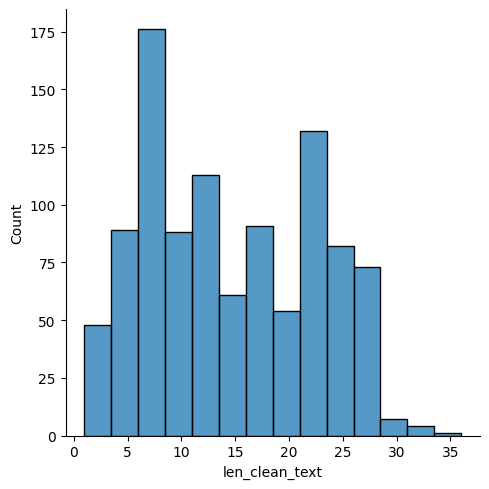

In [7]:
clean_text_df = tweets_df['text'].apply(tweet_cleaner_tokenizer,args=(True,)).to_frame()
clean_text_df = clean_text_df.dropna()
clean_text_df.columns=['clean_text']
clean_text_df['len_clean_text'] = clean_text_df['clean_text'].apply(lambda x: len(x))
sns.displot(data=clean_text_df,x='len_clean_text')

In [8]:
for i in range(2,11):
    name = str(i) + 'gram'
    dist_column_name = str(i) + 'gram'
    token_column_name = str(i) + 'gram_similar_tokens'
    clean_text_df[name] = clean_text_df['clean_text'].apply(lambda x: tweet_comparer(x,clean_text_df['clean_text'].values,i))
    clean_text_df[[dist_column_name,token_column_name]] = pd.DataFrame(clean_text_df[name].tolist(), index= clean_text_df.index)

In [9]:
averages = clean_text_df[['2gram','3gram','4gram','5gram','6gram','7gram','8gram','9gram','10gram']].mean()
averages

2gram     0.118018
3gram     0.063205
4gram     0.044303
5gram     0.033936
6gram     0.027596
7gram     0.021774
8gram     0.017044
9gram     0.015623
10gram    0.012636
dtype: float64

<Axes: >

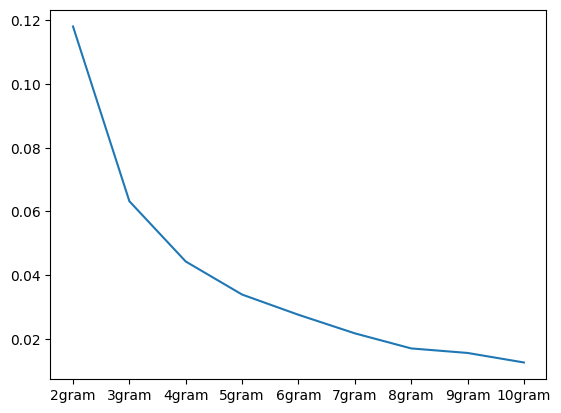

In [10]:
sns.lineplot(averages)

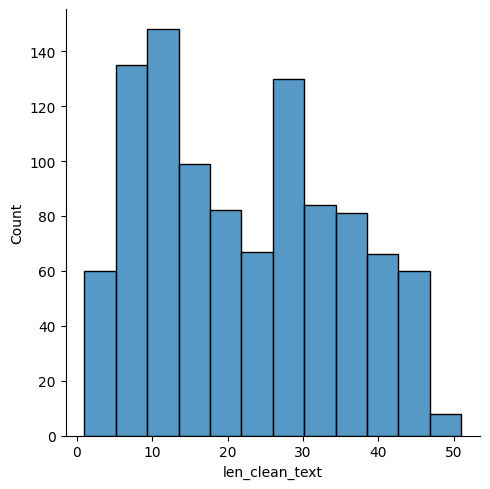

In [11]:
clean_text_stopwords_df = tweets_df['text'].apply(tweet_cleaner_tokenizer,args=(False,)).to_frame()
clean_text_stopwords_df = clean_text_stopwords_df.dropna()
clean_text_stopwords_df.columns=['clean_text']
clean_text_stopwords_df['len_clean_text'] = clean_text_stopwords_df['clean_text'].apply(lambda x: len(x))
sns.displot(data=clean_text_stopwords_df,x='len_clean_text')

In [12]:
for i in range(2,11):
    name = str(i) + 'gram'
    dist_column_name = str(i) + 'gram'
    token_column_name = str(i) + 'gram_similar_tokens'
    clean_text_stopwords_df[name] = clean_text_stopwords_df['clean_text'].apply(lambda x: tweet_comparer(x,clean_text_stopwords_df['clean_text'].values,i))
    clean_text_stopwords_df[[dist_column_name,token_column_name]] = pd.DataFrame(clean_text_stopwords_df[name].tolist(), index= clean_text_stopwords_df.index)

In [13]:
averages_stopwords = clean_text_stopwords_df[['2gram','3gram','4gram','5gram','6gram','7gram','8gram','9gram','10gram']].mean()
averages_stopwords

2gram     0.122982
3gram     0.074476
4gram     0.051483
5gram     0.040610
6gram     0.035487
7gram     0.030930
8gram     0.027609
9gram     0.023883
10gram    0.019981
dtype: float64

<Axes: >

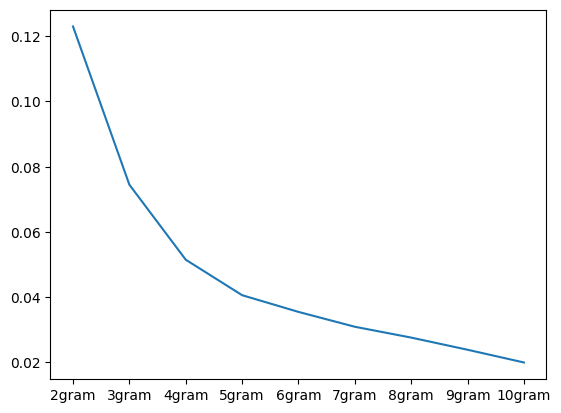

In [14]:
sns.lineplot(averages_stopwords)

As we can see,even after removing the stopwords, the best ngram option to choose is Trigrams as it offers the best trade-off between similarity and gram formation.

## News Data

### For Text Data alone

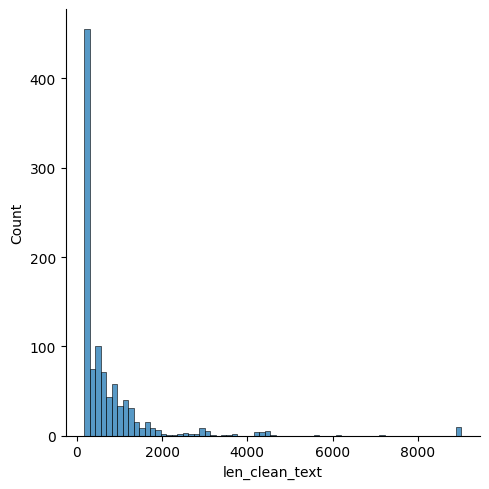

In [64]:
clean_news_df = news_df['text'].apply(news_cleaner_tokenizer).to_frame()
clean_news_df = clean_news_df.dropna()
clean_news_df.columns=['clean_text']
clean_news_df = clean_news_df.drop_duplicates(subset=['clean_text'])
clean_news_df['len_clean_text'] = clean_news_df['clean_text'].apply(lambda x: len(x))
sns.displot(data=clean_news_df,x='len_clean_text')

In [67]:
for i in range(2,7):
    print('processing ngrams of size: ' + str(i))
    name = str(i) + 'gram'
    dist_column_name = str(i) + 'gram'
    token_column_name = str(i) + 'gram_similar_tokens'
    clean_news_df[name] = clean_news_df['clean_text'].swifter.apply(tweet_comparer,args=(clean_news_df['clean_text'].values,i))
    clean_news_df[[dist_column_name,token_column_name]] = pd.DataFrame(clean_news_df[name].tolist(), index= clean_news_df.index)

processing ngrams of size: 2


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 3


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 4


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 5


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 6


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

In [68]:
averages_news = clean_news_df[['2gram','3gram','4gram','5gram','6gram']].mean()
averages_news

2gram    0.597667
3gram    0.577310
4gram    0.562640
5gram    0.550358
6gram    0.538826
dtype: float64

<Axes: >

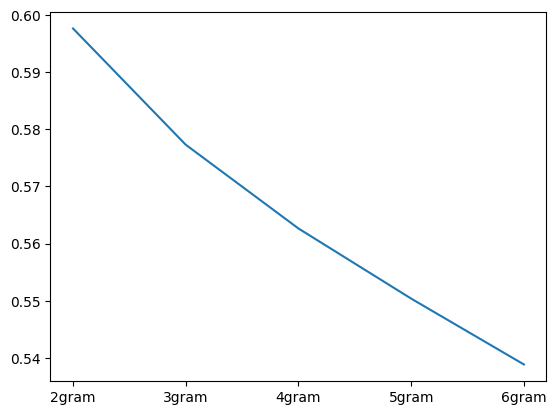

In [69]:
sns.lineplot(averages_news)

### For Titles alone

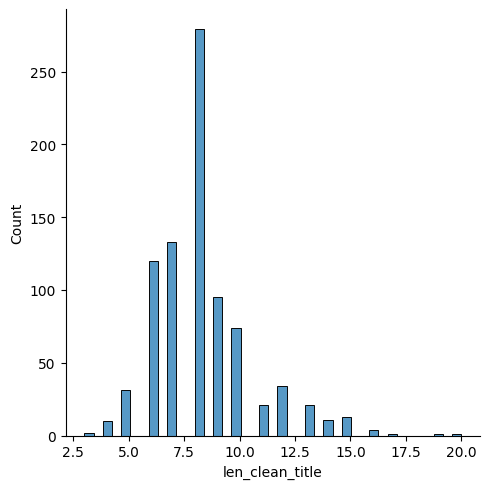

In [77]:
clean_news_title_df = news_df['title'].apply(news_cleaner_tokenizer).to_frame()
clean_news_title_df = clean_news_title_df.dropna()
clean_news_title_df.columns=['clean_title']
clean_news_title_df = clean_news_title_df.drop_duplicates(subset=['clean_title'])
clean_news_title_df['len_clean_title'] = clean_news_title_df['clean_title'].apply(lambda x: len(x))
sns.displot(data=clean_news_title_df,x='len_clean_title')

In [78]:
for i in range(2,7):
    name = str(i) + 'gram'
    dist_column_name = str(i) + 'gram'
    token_column_name = str(i) + 'gram_similar_tokens'
    clean_news_title_df[name] = clean_news_title_df['clean_title'].apply(lambda x: tweet_comparer(x,clean_news_title_df['clean_title'].values,i))
    clean_news_title_df[[dist_column_name,token_column_name]] = pd.DataFrame(clean_news_title_df[name].tolist(), index= clean_news_title_df.index)

In [79]:
averages_news_title = clean_news_title_df[['2gram','3gram','4gram','5gram','6gram']].mean()
averages_news_title

2gram    0.285122
3gram    0.218721
4gram    0.172155
5gram    0.127947
6gram    0.083717
dtype: float64

<Axes: >

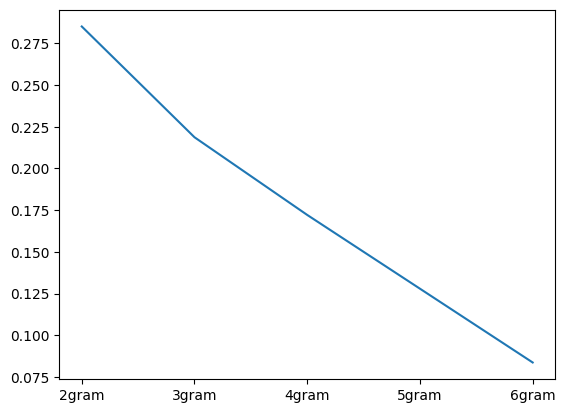

In [80]:
sns.lineplot(averages_news_title)

### For News and Titles combined

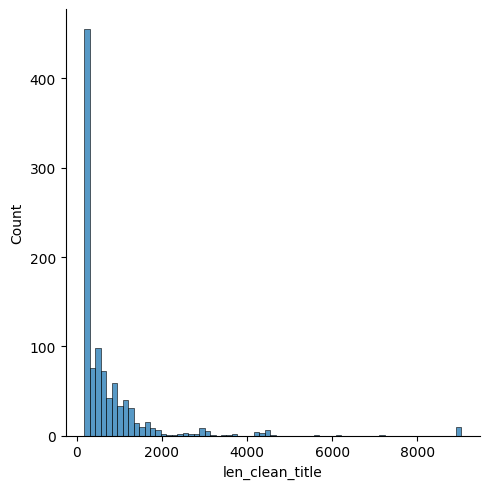

In [81]:
news_df['title_text'] = news_df['title'] + ' ' + news_df['text']
clean_news_title_text_df = news_df['title_text'].apply(news_cleaner_tokenizer).to_frame()
clean_news_title_text_df = clean_news_title_text_df.dropna()
clean_news_title_text_df.columns=['clean_text_title']
clean_news_title_text_df['len_clean_title'] = clean_news_title_text_df['clean_text_title'].apply(lambda x: len(x))
sns.displot(data=clean_news_title_text_df,x='len_clean_title')

In [84]:
for i in range(2,7):
    print('processing ngrams of size: ' + str(i))
    name = str(i) + 'gram'
    dist_column_name = str(i) + 'gram'
    token_column_name = str(i) + 'gram_similar_tokens'
    clean_news_title_text_df[name] = clean_news_title_text_df['clean_text_title'].swifter.apply(tweet_comparer,args=(clean_news_title_text_df['clean_text_title'].values,i))
    clean_news_title_text_df[[dist_column_name,token_column_name]] = pd.DataFrame(clean_news_title_text_df[name].tolist(), index= clean_news_title_text_df.index)

processing ngrams of size: 2


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 3


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 4


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 5


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

processing ngrams of size: 6


Pandas Apply:   0%|          | 0/1018 [00:00<?, ?it/s]

In [85]:
averages_news_title_text = clean_news_title_text_df[['2gram','3gram','4gram','5gram','6gram']].mean()
averages_news_title_text

2gram    0.596695
3gram    0.573623
4gram    0.556849
5gram    0.542880
6gram    0.529233
dtype: float64

<Axes: >

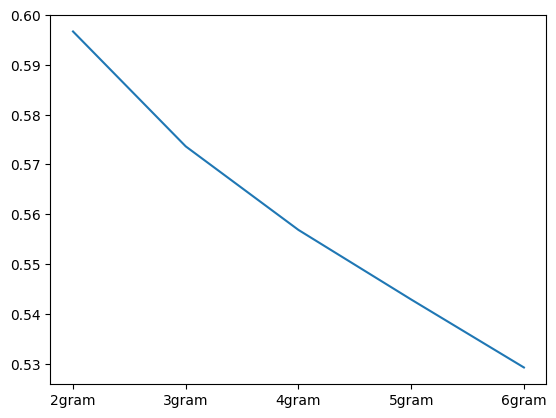

In [86]:
sns.lineplot(averages_news_title_text)

As we can see, when considering either scenario, choosing the ngram size as n=4 works best. Thus is it better to just go with the text.

Let us take a look at the most simillar tweets

In [87]:
clean_text_df[clean_text_df['3gram'] == clean_text_df['3gram'].max()][['clean_text','3gram_similar_tokens','3gram']]

,clean_text,3gram_similar_tokens,3gram
181,"[cnn, renault, announced, departure, week, russian, auto, market, amid, war, ukraine, mayor, announced, factory, used, restart, defunct, moskvich, car, brand, via]","[[renault, announced, departure, week, russian, auto, market, amid, war, ukraine, mayor, announced, factory, used, restart, defunct, moskvich, car, brand]]",0.894737
877,"[renault, announced, departure, week, russian, auto, market, amid, war, ukraine, mayor, announced, factory, used, restart, defunct, moskvich, car, brand]","[[cnn, renault, announced, departure, week, russian, auto, market, amid, war, ukraine, mayor, announced, factory, used, restart, defunct, moskvich, car, brand, via]]",0.894737


And the tweet that had the lowest similarity score

In [88]:
clean_text_df[clean_text_df['3gram'] == clean_text_df['3gram'].min()][['clean_text','3gram_similar_tokens','3gram']].head(5)

,clean_text,3gram_similar_tokens,3gram
0,"[straight, swap, renault, twingo, extreme, awesome]","[[australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi], [think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car], [almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay], [take, selfie, new, win, fuel, voucher, tag, random, winner, announced, book, test, driv...",0.0
2,"[think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car]","[[straight, swap, renault, twingo, extreme, awesome], [australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi], [almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay], [take, selfie, new, win, fuel, voucher, tag, random, winner, announced, book, test, drive], [new, fly, renault, turb...",0.0
3,"[almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay]","[[straight, swap, renault, twingo, extreme, awesome], [australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi], [think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car], [take, selfie, new, win, fuel, voucher, tag, random, winner, announced, book, test, drive], [new, fly, renault, turbo, rallye, special, edition, set, includes, car, ragnotti, andrie, rallye, plus, snow, effect, car, snobeck, be...",0.0
4,"[take, selfie, new, win, fuel, voucher, tag, random, winner, announced, book, test, drive]","[[straight, swap, renault, twingo, extreme, awesome], [australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi], [think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car], [almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay], [new, fly, renault, turbo, rallye, ...",0.0
5,"[new, fly, renault, turbo, rallye, special, edition, set, includes, car, ragnotti, andrie, rallye, plus, snow, effect, car, snobeck, bechu, rallye]","[[straight, swap, renault, twingo, extreme, awesome], [australian, gp, qualifying, melbourne, march, grid, row, eddie, irvine, ferrari, mika, hakkinen, row, johnny, herbert, jean, alesi], [think, blood, thousand, ukrainian, woman, child, pouring, every, renault, car], [almost, worker, russia, still, western, payroll, mcdonald, ikea, renault, levi, strauss, others, pay, salary, thousand, employee, operation, suspended, yum, brand, kfc, confirm, still, pay], [take, selfie, new, win, fuel, vouc...",0.0


Let us take a look at the most simillar article

In [89]:
clean_news_df[clean_news_df['4gram'] == clean_news_df['4gram'].max()][['clean_text','4gram_similar_tokens','4gram']].head(5)

,clean_text,4gram_similar_tokens,4gram
29,"[toyota, urban, cruiser, car, discount, offers, kulgam, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestau...","[[toyota, urban, cruiser, car, discount, offers, kandhamal, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslate...",0.986544
38,"[toyota, urban, cruiser, car, discount, offers, kandhamal, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslates...","[[toyota, urban, cruiser, car, discount, offers, kulgam, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatesta...",0.986544
39,"[toyota, urban, cruiser, car, discount, offers, naharlagun, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslate...","[[toyota, urban, cruiser, car, discount, offers, kulgam, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatesta...",0.986544
46,"[toyota, urban, cruiser, car, discount, offers, mayurbhanja, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslat...","[[toyota, urban, cruiser, car, discount, offers, kulgam, march, explore, wednesday, march, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, c

And the article that had the lowest similarity score

In [90]:
clean_news_df[clean_news_df['4gram'] == clean_news_df['4gram'].min()][['clean_text','4gram_similar_tokens','4gram']].head(5)

,clean_text,4gram_similar_tokens,4gram
16,"[mcdonald, moscow, style, back, russian, economy, stumbles, seattle, times, skip, contentcoronaviruslocal, newstraffic, lablaw, justicelocal, politicseducationeducation, labeastsideenvironmenthealthdatamental, healthproject, homelesstimes, watchdogbusiness, techboeing, aerospaceamazonmicrosofttechnologyreal, estateeconomyartificial, intelligencenation, worldnation, world, politicsodditiessportsseahawksmarinershuskiescougarsstormsounderskrakenreignhigh, school, sportson, puzzleshoroscopeslife...","[[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, ne...",0.0
26,"[gm, develops, continuity, plan, amid, china, outbreak, open, navigationbusinesssearchclose, menu, phvote, homelatest, newssectionstopicsspecial, coveragescouponspromo, codes, login, profile, logout, exclusivesabout, rapplerbrandrapbulletin, boardbusinessentertainmentenvironmenthustlelife, stylemovephphilippinesnewsbreaksciencesportstechnologyvideovoicesworldexclusive, contentexclusive, eventssee, brandrapcommunicartget, ready, meannouncementsbeyond, buydata, storiesdetoursfinance, industrie...","[[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, ne...",0.0
48,"[renault, otc, rnlsy, analyst, ratings, price, targets, predictions, benzingaespañolitalianofrançaismy, accountmy, accountnotificationslog, data, apiseventsmarketfypremarketcontributeespañolitalianofrançaissign, innews, earningsguidancedividendsm, abuybackslegalinterviewsmanagementretail, salesofferingsiposinsider, hoursmoversetfsforexcannabiscommoditiesoptionsbinary, optionsbondsfuturescme, groupglobal, stocksdigital, securitiesratings, analyst, colordowngradesupgradesinitiationsprice, targ...","[[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare, carscompare, bikesemi, calculatordealerscar, newsbike, newslatestauto, ne...",0.0
58,"[jeep, pulls, china, meddling, business, straits, timesthe, straits, timestoggle, navigation, best, news, website, mobile, service, digital, media, awards, asia, straits, times, best, news, website, mobile, service, digital, media, awards, asia, lifethe, straits, times, edition, internationalsingaporemain, navigationhomesingaporetoggle, dropdownjobshousingparenting, educationpoliticshealthtransportcourts, crimeconsumerenvironmentcommunityasiatoggle, dropdownse, asiaeast, asiasouth, dropdownu...","[[lml, bikes, car, dealers, lml, bikes, showrooms, india, explore, friday, january, log, searchnotificationstop, sectionsauto, newscar, newsbike, newslatestauto, newsphotosvideoselectric, vehiclestrendingmy, readsoffersnewfind, carsfind, bikescompare, carscompare, bikesemi, calculatordealersexplore, autoabout, uscontact, ussitemaprssterms, useprivacy, policycopyright, ht, media, limited, rights, carsfind, bikescompare,

### Why did we chose different N's

We chose different N's for each scenario, because the scenario required it. As we could see for tweets, the best performance was for N=3, while for articles the best performance was N=4. This makes sense, as the average length of a sentence in the articles was more than the tweet, thus allowing for more similarity across a larger Ngram

<Axes: >

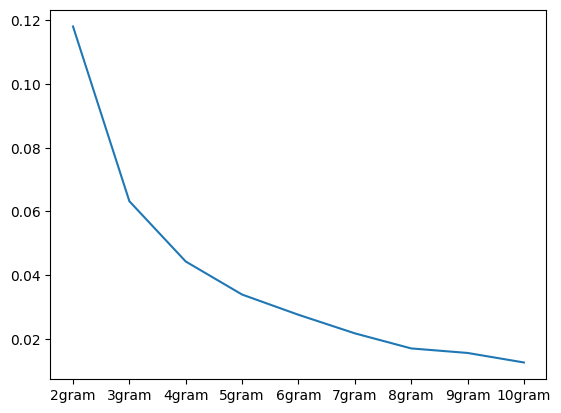

In [91]:
sns.lineplot(averages)

<Axes: >

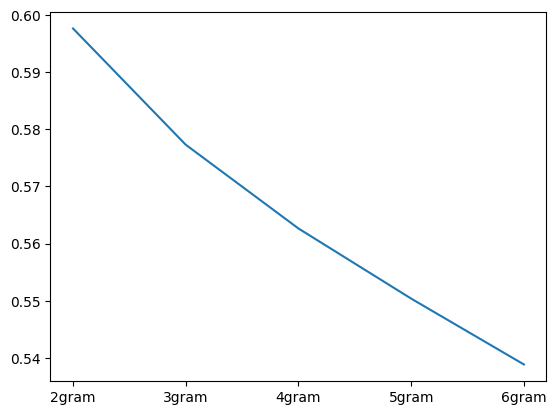

In [92]:
sns.lineplot(averages_news)